In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
path = r'/Users/macintosh/Documents/OneDrive - Cardiff University/04 - Projects/02 - Warwick/04 - Data/'
file = "compiled_data.csv"

In [10]:
df = pd.read_csv(path+file, index_col=0, parse_dates=True)

In [42]:

df["week"]= df.index.weekofyear
df.head()

,Electricity,Heat,HeatFlow,Temperature,Hour,DayOfWeek_name,DayOfWeek,Month,Weekday,HH,Holiday,Date,Season,week
2016-01-01 00:00:00,26.0,0.1,3.3,2.7300,0,Friday,4,1,1,0,1,2016-01-01,Winter,53
2016-01-01 00:30:00,27.0,0.2,3.2,2.6400,0,Friday,4,1,1,1,1,2016-01-01,Winter,53
2016-01-01 01:00:00,29.0,0.1,3.3,2.5500,1,Friday,4,1,1,2,1,2016-01-01,Winter,53
2016-01-01 01:30:00,29.0,0.1,3.2,1.5425,1,Friday,4,1,1,3,1,2016-01-01,Winter,53
2016-01-01 02:00:00,29.0,0.2,3.3,0.5350,2,Friday,4,1,1,4,1,2016-01-01,Winter,53


In [105]:
signal = df.loc[df["Month"]==2, "Electricity"].values

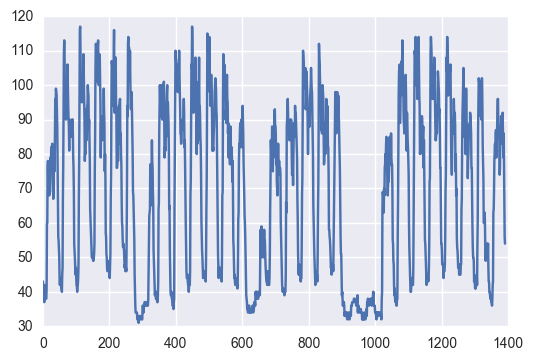

In [131]:
plot = plt.plot(signal) #30min resolution

In [128]:
fourrier = np.fft.rfft(signal)
fourrier = [abs(x) for x in fourrier] #only look at the real numbers
sample_rate = 30*60 #Sample are every 1800sec
freq = np.fft.rfftfreq(len(signal), d=1./sample_rate)

In [118]:
mean_fourrier = np.mean(fourrier)
std= np.std(fourrier)

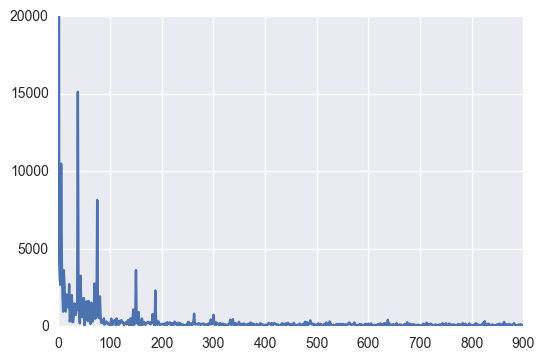

In [129]:
axes = plt.gca()
axes.set_ylim([0,20000])
plot = plt.plot(freq, fourrier)

In [133]:
print("mean", mean_fourrier)
for index, x in enumerate(fourrier):
    
    if x>mean_fourrier+std:
        print("frequency:", freq[index])

mean 429.896292253
0.0
1.29310344828
5.1724137931
6.46551724138
37.5
75.0
